In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
data = pd.read_csv('./data/data_flats.csv', sep=";")
data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.599914,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 56 columns):
id                                       30469 non-null int64
full_sq                                  30469 non-null int64
life_sq                                  24086 non-null float64
floor                                    30302 non-null float64
sub_area                                 30469 non-null object
preschool_quota                          23781 non-null float64
preschool_education_centers_raion        30469 non-null int64
school_quota                             23784 non-null float64
school_education_centers_raion           30469 non-null int64
school_education_centers_top_20_raion    30469 non-null int64
hospital_beds_raion                      16029 non-null float64
healthcare_centers_raion                 30469 non-null int64
university_top_20_raion                  30469 non-null int64
sport_objects_raion                      30469 non-null int64
additional_e

In [20]:
data.isnull().sum()

id                                           0
full_sq                                      0
life_sq                                   6383
floor                                      167
sub_area                                     0
preschool_quota                           6688
preschool_education_centers_raion            0
school_quota                              6685
school_education_centers_raion               0
school_education_centers_top_20_raion        0
hospital_beds_raion                      14440
healthcare_centers_raion                     0
university_top_20_raion                      0
sport_objects_raion                          0
additional_education_raion                   0
culture_objects_top_25_raion                 0
shopping_centers_raion                       0
office_raion                                 0
metro_min_avto                               0
metro_km_avto                                0
metro_min_walk                              25
metro_km_walk

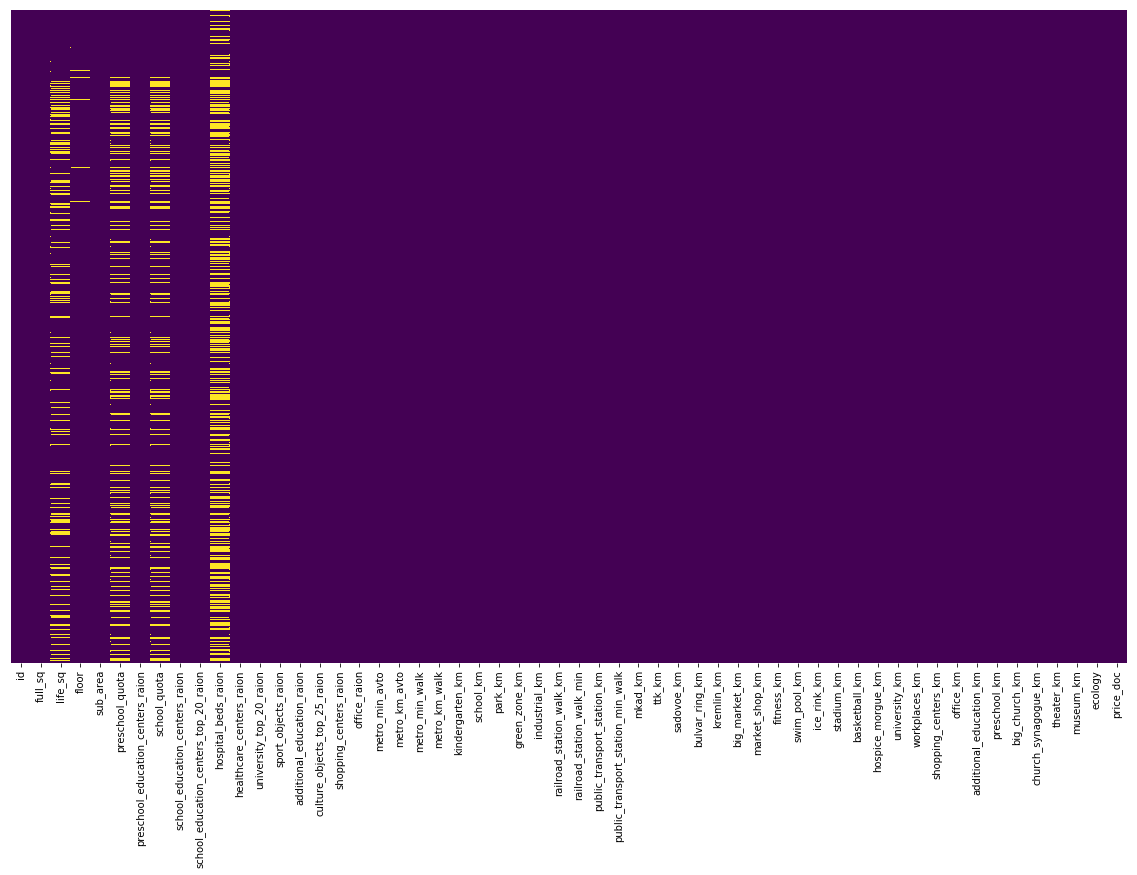

In [23]:
fix, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(data.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [11]:
data = data.dropna()

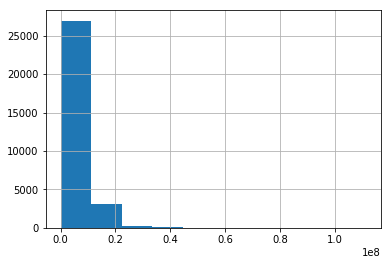

In [24]:
data.price_doc.hist()

In [176]:
df1 = pd.DataFrame({'price': data.price_doc[data.sub_area=='Lefortovo'], 'area': 'Lefortovo'})
df2 = pd.DataFrame({'price': data.price_doc[data.sub_area=='Perovo'], 'area': 'Perovo'})
df3 = pd.DataFrame({'price': data.price_doc[data.sub_area=='Basmannoe'], 'area': 'Basmannoe'})
df4 = pd.DataFrame({'price': data.price_doc[data.sub_area=='Bogorodskoe'], 'area': 'Bogorodskoe'})
area_data = pd.concat([df1, df2, df3, df4])

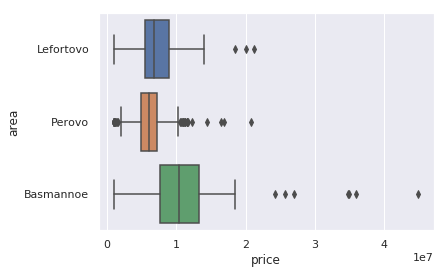

In [177]:

sns.set()
sns.boxplot(data=area_data, x='price', y='area')

In [178]:
data.ecology.value_counts()

poor            4766
good            3243
satisfactory    2618
excellent       2482
no data          543
Name: ecology, dtype: int64

In [179]:
ecology_dict = {'no data':0, 'poor':1, 'satisfactory':2, 'good':3, 'excellent':4 }
data.ecology = data.ecology.replace(to_replace=ecology_dict)
data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,3,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,4,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,1,5700000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,4,16331452
6,7,25,14.0,10.0,Sokol'niki,933.0,5,5050.0,5,0,...,0.513689,0.067725,0.273019,0.516979,0.822377,0.318230,0.752223,2.969315,1,5500000


In [181]:
data.ecology.mean()

2.1725021974802226

In [183]:
data.sub_area.value_counts()

Nekrasovka               585
Krjukovo                 393
Tverskoe                 328
Solncevo                 303
Ljublino                 296
Gol'janovo               295
Nagatinskij Zaton        265
Vyhino-Zhulebino         263
Birjulevo Vostochnoe     263
Izmajlovo                261
Zjuzino                  257
Horoshevo-Mnevniki       256
Perovo                   246
Severnoe Tushino         240
Zapadnoe Degunino        238
Ochakovo-Matveevskoe     237
Jasenevo                 230
Bibirevo                 229
Golovinskoe              220
Kon'kovo                 220
Caricyno                 218
Tekstil'shhiki           215
Akademicheskoe           211
Veshnjaki                210
Ramenki                  210
Koptevo                  204
Novogireevo              200
Mozhajskoe               196
Pechatniki               192
Sokolinaja Gora          188
                        ... 
Levoberezhnoe            122
Ajeroport                122
Jaroslavskoe             121
Donskoe       

In [184]:
pd.get_dummies(data.sub_area).shape

(13652, 83)

In [185]:
subareas_with_freqs = list(data.sub_area.value_counts())

In [186]:
top_areas_count =len([x for x in subareas_with_freqs if x > int(np.percentile(subareas_with_freqs, 90))])
top_areas_count

9

In [187]:
all_areas = data.sub_area.value_counts().index
top_areas = list(all_areas)[:top_areas_count]
areas_to_throw_away = list(set(all_areas) - set(top_areas))
data.loc[data['sub_area'].isin(areas_to_throw_away), 
             'sub_area'] = 'other'

In [188]:
len(data.sub_area.value_counts())

10

In [189]:
pd.get_dummies(data.sub_area).head()

,Birjulevo Vostochnoe,Gol'janovo,Krjukovo,Ljublino,Nagatinskij Zaton,Nekrasovka,Solncevo,Tverskoe,Vyhino-Zhulebino,other
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,1


У нашего распределения есть проблема — слишком сильный перепад. Много квартир в среднем сегменте, но очень мало дорогих квартир. На практике часто в таких случаях логорифмируют переменную, чтобы уменьшить перепады и сгладить хвост.

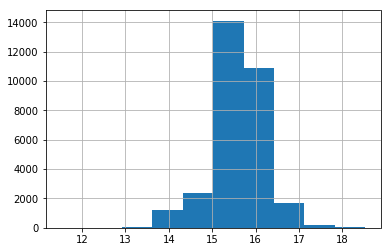

In [25]:
data['price_doc'] = data['price_doc'].apply(lambda w: np.log(w + 1))
data.price_doc.hist();

Теперь займемся отбором признаков.  Для начала нам надо проверить, нет ли мультиколлинеарности — сильной взаимосвязи между независимыми признаками. Для этого построим матрицу корреляций для признаков:

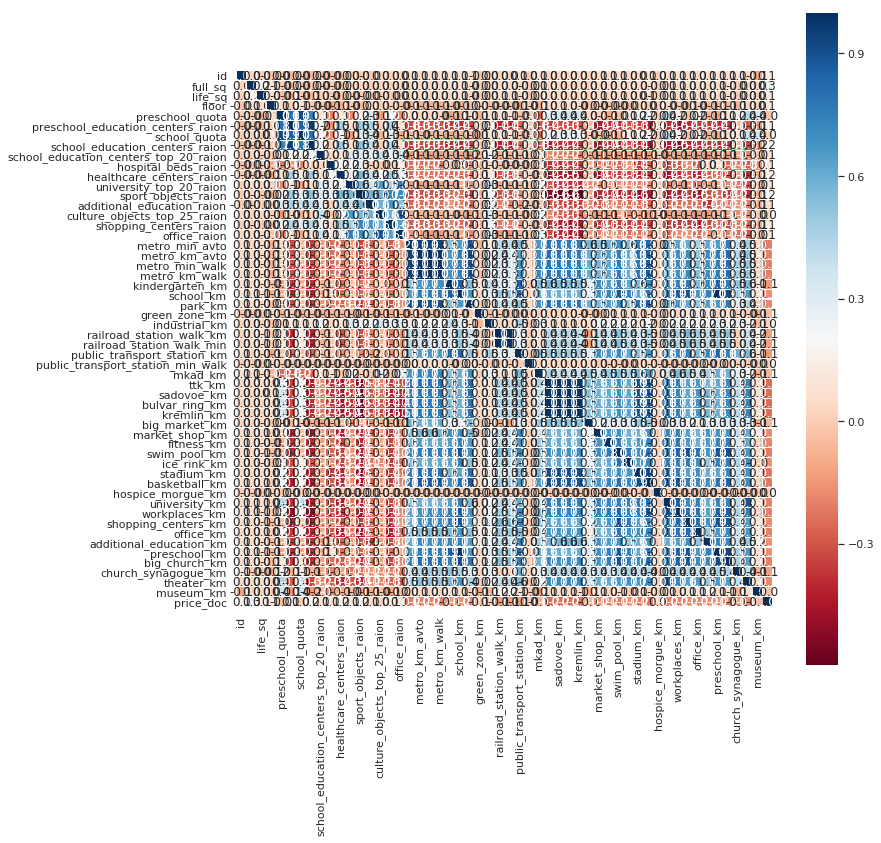

In [26]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(data.corr(), square=True,
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu")

In [ ]:
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
def print_regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f'MSE = {mse:.2f}, RMSE = {rmse:.2f}')